Project- PFAS In GA
David Luis Hiraldo-Panchana Alg k-means clustering 

DB-WaterPro

Hypothesis 1 -  So I was thinking to see the correlation between the number of violations and the number of sites visited 

In [29]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

In [4]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [5]:
water = pd.read_csv("WaterPro.csv")

In [5]:
water.shape

(2379, 10)

In [6]:
water.head()

,PWS ID,PWS Name,PWS Type,Primary Source,Counties Served,Cities Served,PopulationServed Count,Number of Facilities,Number of Violations,Number of Site Visits
0,GA2610011,A B C MOBILE HOME PARK,Community water system,Ground water,Sumter,NaN,75,6,115,5
1,GA1830006,AARON MOBILE HOME PARK,Community water system,Ground water,Long,NaN,112,4,23,8
2,GA3150000,ABBEVILLE,Community water system,Ground water,Wilcox,NaN,"2,960",10,15,4
3,GA2770004,ABRAHAM BALDWIN AGRI. COLLEGE,Community water system,Ground water,Tift,TIFTON,"4,086",5,26,5
4,GA1850009,ACADEMY ACRES SUBDIVISION,Community water system,Ground water,Lowndes,VALDOSTA,325,6,6,5


In [7]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PWS ID                  2379 non-null   object
 1   PWS Name                2379 non-null   object
 2   PWS Type                2379 non-null   object
 3   Primary Source          2379 non-null   object
 4   Counties Served         2379 non-null   object
 5   Cities Served           1281 non-null   object
 6   PopulationServed Count  2379 non-null   object
 7   Number of Facilities    2379 non-null   int64 
 8   Number of Violations    2379 non-null   int64 
 9   Number of Site Visits   2379 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 186.0+ KB


In [10]:
water['Number of Facilities'] = water['Number of Facilities'].astype(float)
water['Number of Violations'] = water['Number of Violations'].astype(float)
water['Number of Site Visits'] = water['Number of Site Visits'].astype(float)
print()
print(water.dtypes)
water



PWS ID                     object
PWS Name                   object
PWS Type                   object
Primary Source             object
Counties Served            object
Cities Served              object
PopulationServed Count     object
Number of Facilities      float64
Number of Violations      float64
Number of Site Visits     float64
dtype: object


,PWS ID,PWS Name,PWS Type,Primary Source,Counties Served,Cities Served,PopulationServed Count,Number of Facilities,Number of Violations,Number of Site Visits
0,GA2610011,A B C MOBILE HOME PARK,Community water system,Ground water,Sumter,NaN,75,6.0,115.0,5.0
1,GA1830006,AARON MOBILE HOME PARK,Community water system,Ground water,Long,NaN,112,4.0,23.0,8.0
2,GA3150000,ABBEVILLE,Community water system,Ground water,Wilcox,NaN,"2,960",10.0,15.0,4.0
3,GA2770004,ABRAHAM BALDWIN AGRI. COLLEGE,Community water system,Ground water,Tift,TIFTON,"4,086",5.0,26.0,5.0
4,GA1850009,ACADEMY ACRES SUBDIVISION,Community water system,Ground water,Lowndes,VALDOSTA,325,6.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...
2374,GA0510134,WILMINGTON ISLAND WATER SUPPLY,Transient non-community system,Ground water,Chatham,NaN,100,3.0,33.0,4.0
2375,GA0450028,WOODLAND CHRISTIAN CAMP,Transient non-community system,Ground water,Carroll,TEMPLE,275,5.0,14.0,3.0
2376,GA2410098,YMCA-CAMP HIGH HARBOUR,Transient non-community system,Ground water,Rabun,CLAYTON,160,4.0,13.0,3.0
2377,GA1930006,YODER`S RESTAURANT,Transient non-community system,Ground water,Macon,NaN,200,2.0,10.0,7.0


In [11]:
print(water.dtypes)

PWS ID                     object
PWS Name                   object
PWS Type                   object
Primary Source             object
Counties Served            object
Cities Served              object
PopulationServed Count     object
Number of Facilities      float64
Number of Violations      float64
Number of Site Visits     float64
dtype: object


In [12]:
water.isnull().sum()

PWS ID                       0
PWS Name                     0
PWS Type                     0
Primary Source               0
Counties Served              0
Cities Served             1098
PopulationServed Count       0
Number of Facilities         0
Number of Violations         0
Number of Site Visits        0
dtype: int64

In [13]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PWS ID                  2379 non-null   object 
 1   PWS Name                2379 non-null   object 
 2   PWS Type                2379 non-null   object 
 3   Primary Source          2379 non-null   object 
 4   Counties Served         2379 non-null   object 
 5   Cities Served           1281 non-null   object 
 6   PopulationServed Count  2379 non-null   object 
 7   Number of Facilities    2379 non-null   float64
 8   Number of Violations    2379 non-null   float64
 9   Number of Site Visits   2379 non-null   float64
dtypes: float64(3), object(7)
memory usage: 186.0+ KB


In [14]:
water.describe()

,Number of Facilities,Number of Violations,Number of Site Visits
count,2379.000000,2379.000000,2379.000000
mean,6.022699,15.356032,5.811686
std,4.501975,24.584790,5.855264
min,2.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000
50%,5.000000,9.000000,5.000000
75%,7.000000,18.000000,6.000000
max,77.000000,523.000000,70.000000


In [15]:
water['PWS ID'].unique()

array(['GA2610011', 'GA1830006', 'GA3150000', ..., 'GA2410098',
       'GA1930006', 'GA3110112'], dtype=object)

In [16]:
len(water['PWS ID'].unique())

2379

In [17]:
water['PWS Type'].unique()

array(['Community water system', 'Non-Transient non-community system',
       'Transient non-community system'], dtype=object)

In [18]:
len(water['PWS Type'].unique())

3

In [19]:
X = water
y = water['PWS Type']

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['PWS Type'] = le.fit_transform(X['PWS Type'])

y = le.transform(y)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PWS ID                  2379 non-null   object 
 1   PWS Name                2379 non-null   object 
 2   PWS Type                2379 non-null   int32  
 3   Primary Source          2379 non-null   object 
 4   Counties Served         2379 non-null   object 
 5   Cities Served           1281 non-null   object 
 6   PopulationServed Count  2379 non-null   object 
 7   Number of Facilities    2379 non-null   float64
 8   Number of Violations    2379 non-null   float64
 9   Number of Site Visits   2379 non-null   float64
dtypes: float64(3), int32(1), object(6)
memory usage: 176.7+ KB


In [22]:
water.drop(['PWS ID', 'PWS Name','Primary Source','PopulationServed Count'], axis=1, inplace=True)

In [23]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PWS Type               2379 non-null   int32  
 1   Counties Served        2379 non-null   object 
 2   Cities Served          1281 non-null   object 
 3   Number of Facilities   2379 non-null   float64
 4   Number of Violations   2379 non-null   float64
 5   Number of Site Visits  2379 non-null   float64
dtypes: float64(3), int32(1), object(2)
memory usage: 102.3+ KB


In [24]:
water.drop(['Cities Served'], axis=1, inplace=True)


In [25]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PWS Type               2379 non-null   int32  
 1   Counties Served        2379 non-null   object 
 2   Number of Facilities   2379 non-null   float64
 3   Number of Violations   2379 non-null   float64
 4   Number of Site Visits  2379 non-null   float64
dtypes: float64(3), int32(1), object(1)
memory usage: 83.8+ KB


In [26]:
cols = X.columns

<function matplotlib.pyplot.show(close=None, block=None)>

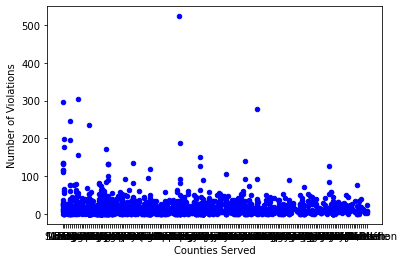

In [29]:
water.plot(kind='scatter', x='Counties Served',y='Number of Violations', color='blue')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

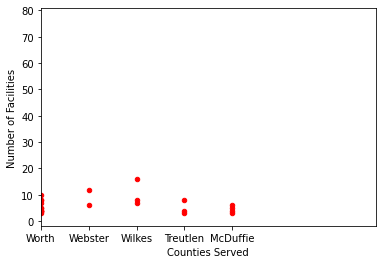

In [27]:
water.plot(kind='scatter', x='Counties Served',y='Number of Facilities', color='red')
plt.xlim(156,163)
plt.show

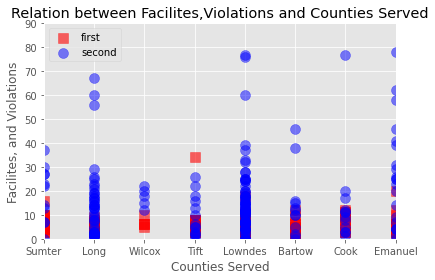

In [63]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot()
plt.style.use('ggplot')
plt.title('Relation between Facilites,Violations and Counties Served')
plt.xlabel('Counties Served')
plt.ylabel('Facilites, and Violations')
ax1.scatter(x=water['Counties Served'],y=water['Number of Facilities'], s=100, c='r', marker="s",alpha=0.6, label='first')
ax1.scatter(x=water['Counties Served'],y=water['Number of Violations'], s=100, c='b', marker="o",alpha=0.5, label='second')
plt.xlim(0,7)
plt.ylim(0,90)

plt.legend(loc='upper left');
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [47]:
X = pd.DataFrame(X, columns=[cols])

In [48]:
X.head()

,PWS Type,Number of Facilities,Number of Violations,Number of Site Visits
0,0.0,0.053333,0.219885,0.071429
1,0.0,0.026667,0.043977,0.114286
2,0.0,0.106667,0.028681,0.057143
3,0.0,0.040000,0.049713,0.071429
4,0.0,0.053333,0.011472,0.071429


In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [50]:
kmeans.cluster_centers_

array([[-1.30451205e-15,  6.43478261e-02,  3.47770665e-02,
         9.60165631e-02],
       [ 8.68501529e-01,  2.53822630e-02,  1.50770958e-02,
         4.87549148e-02]])

In [51]:
kmeans.inertia_

60.189092575144386

In [52]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1897 out of 2379 samples were correctly labeled.


In [53]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.80


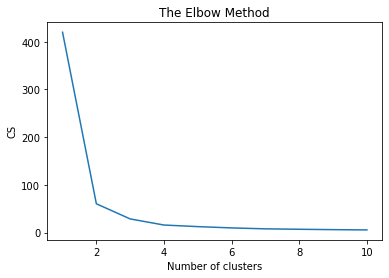

In [54]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1897 out of 2379 samples were correctly labeled.
Accuracy score: 0.80


In [56]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1725 out of 2379 samples were correctly labeled.
Accuracy score: 0.73


In [57]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 0 out of 2379 samples were correctly labeled.
Accuracy score: 0.00


In [2]:
!pip install plotly-geo==1.0.0
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Alien\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Alien\\AppData\\Local\\Temp\\pip-install-zvdt3i_e\\fiona_4f2aab113e6e4a779ca64c2b0bbe681f\\setup.py'"'"'; __file__='"'"'C:\\Users\\Alien\\AppData\\Local\\Temp\\pip-install-zvdt3i_e\\fiona_4f2aab113e6e4a779ca64c2b0bbe681f\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Alien\AppData\Local\Temp\pip-pip-egg-info-rdob9mpy'
         cwd: C:\Users\Alien\AppData\Local\Temp\pip-install-zvdt3i_e\fiona_4f2aab113e6e4a779ca64c2b0bbe681f\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERRO

    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Alien\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Alien\\AppData\\Local\\Temp\\pip-install-zvdt3i_e\\fiona_aa4b93dbaab54ece8a766ccc5deb0feb\\setup.py'"'"'; __file__='"'"'C:\\Users\\Alien\\AppData\\Local\\Temp\\pip-install-zvdt3i_e\\fiona_aa4b93dbaab54ece8a766ccc5deb0feb\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Alien\AppData\Local\Temp\pip-pip-egg-info-9th0162d'
         cwd: C:\Users\Alien\AppData\Local\Temp\pip-install-zvdt3i_e\fiona_aa4b93dbaab54ece8a766ccc5deb0feb\
    Complete output (1 lines):
    A GD

  Running setup.py clean for fiona
Failed to build fiona
    Running setup.py install for fiona: started
    Running setup.py install for fiona: finished with status 'error'
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20467 sha256=0efaeceb4866ff6ebcb66a0b4d78508713bdbd6d6167dd5864c694239669532f
  Stored in directory: c:\users\alien\appdata\local\pip\cache\wheels\6f\f4\b1\245a940ae91c0aa70a1344c7d827cd85806bd701cb5a9f67e0
Successfully built pyshp


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Alien\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Alien\\AppData\\Local\\Temp\\pip-install-ytk66akd\\shapely_2696fff1943d44238952947b8a577c5c\\setup.py'"'"'; __file__='"'"'C:\\Users\\Alien\\AppData\\Local\\Temp\\pip-install-ytk66akd\\shapely_2696fff1943d44238952947b8a577c5c\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Alien\AppData\Local\Temp\pip-pip-egg-info-4mq9qej_'
         cwd: C:\Users\Alien\AppData\Local\Temp\pip-install-ytk66akd\shapely_2696fff1943d44238952947b8a577c5c\
    Complete output (9 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Alien\AppData\Local\Temp\pip-install-ytk66akd\shapely_2696fff1943d44238952947b8a577c5c\setup.py", lin

In [7]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv("WaterPro.csv")
df_sample_r = df_sample[df_sample['STNAME'] == 'Georgia']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Georgia'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig = px.choropleth(fin_usa, locations='State', locationmode="USA-states", scope="usa", color=2013, range_color=(0, 50))
fig.show()

In [ ]:
conda install geopandas

In [30]:
import plotly.express as px

fig = px.choropleth(locations=["CA", "TX", "NY"], locationmode="USA-states", color=[1,2,3], scope="usa")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [31]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'